In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['axes.labelweight'] = 'bold'
import warnings
warnings.filterwarnings('ignore')
! wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
data = pd.read_csv('insurance.csv')
data.info() #dasar informasi data
data.head()


--2021-12-06 08:38:25--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2021-12-06 08:38:25 (72.6 MB/s) - ‘insurance.csv’ saved [50264/50264]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float6

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


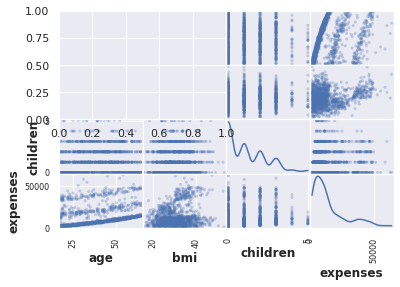

In [2]:
#visualise data
from pandas.plotting import scatter_matrix
scatter_matrix(data[['age','sex','bmi', 'children','expenses']], alpha=0.3, diagonal='kde')
plt.figure(1)
plt.subplot(2,2,1)

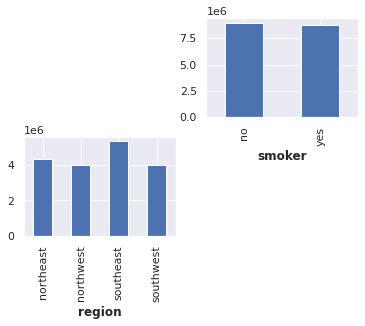

In [3]:
data.groupby(['sex'])['expenses'].sum().plot.bar()
plt.subplot(2,2,2)
data.groupby(['smoker'])['expenses'].sum().plot.bar()
plt.subplot(2,2,3)
data.groupby(['region'])['expenses'].sum().plot.bar()

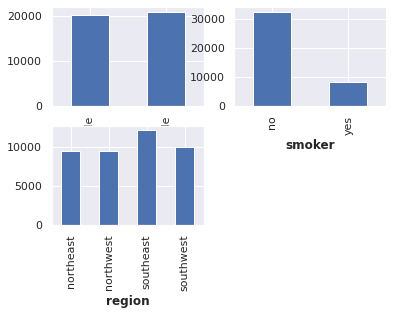

In [4]:
plt.figure(2)
plt.subplot(2,2,1)
data.groupby(['sex'])['bmi'].sum().plot.bar()
plt.subplot(2,2,2)
data.groupby(['smoker'])['bmi'].sum().plot.bar()
plt.subplot(2,2,3)
data.groupby(['region'])['bmi'].sum().plot.bar()

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
catColumns = ['sex', 'smoker', 'region']
data_dum = pd.get_dummies(data, columns = catColumns, drop_first=True)
data_dum.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [7]:
x = data_dum[['age', 'bmi', 'smoker_yes']]
y = data_dum['expenses']
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

In [8]:
#membentuk estimator menggunakan regresi linear
linreg = LinearRegression()
#membentuk estimator menggunakan model reg ridge dengan CV =5
ridgereg = RidgeCV(alphas=(0.1,0.3,0.7,1.0),cv=5)
#membentuk estimator menggunakan model reg lasso dengan CV = 5
lassoreg = LassoCV(eps=0.001, cv = 5)
from sklearn.model_selection import cross_val_score

In [9]:
linreg.fit(x,y) #membuat model regresi untuk x dan y
linreg.score(x,y) #skor regresi linear atau Nilai R square

0.7474906878170721

In [10]:
#memunculkan koefisien Beta B1,B2,B3
linreg.coef_
#memunculkan intercept atau Beta nol-B0
linreg.intercept_

-11679.047039164954

In [11]:
def calc_insurance(age, bmi , smoking):
  y = ((age*linreg.coef_[0])+ (bmi*linreg.coef_[1] )+ (smoking*linreg.coef_[2]) - (linreg.intercept_))  
  print(y)

In [12]:
print(calc_insurance(36, 24, 0))

28766.82660467917
None
